In [1]:
import numpy as np
from matplotlib import pyplot as plt

- (A): Since there is no work done in the system (push/pull), the first law of thermodynamics tells us that the change in energy equals heat. We're given that the gas gains 580 J of heat, which we can equate to the total energy. I know that the change of total energy equals the change of kinetic energy because there is no KE bulk, PE bulk, E chem, PE internal, or E rest
    - KE_bulk = 0 because the container is at rest throughout the data collection
    - PE_bulk = 0 because during data collection, the container remains at the same height 
    - PE_internal = 0 because there are no new bonds forming
    - E_rest = 0 because there is no adding or removing particles (constant n given)
    - E_chem = 0 because bonds aren't forming or breaking 
- I used the equation for the change of kinetic energy (deltaKE = f/2 * N * k * T) to rearrange and solve for the degrees of freedom

In [2]:
#B:
#isochoric (same volume)

def degrees_of_freedom(KE, T): #rearranged change in kinetic energy equation
    n = 1 #given amount of moles
    R = 8.314 #constant
    f = (2 * KE) / (n * R * T)
    return f

print("The degrees of freedom of the ideal gas are:", np.round(degrees_of_freedom(580, 23.5), decimals=0))

def heat_capacity_isochoric(f): #dependent on degrees of freedom
    N = 6.022 * 10 **23 #number of particles = 1 mole
    k = 1.38 * 10 ** (-23) #J/K
    Cv = (f/2) * N * k
    return Cv #J/K

heat_cap = heat_capacity_isochoric(6) #6 degrees of freedom

#change in entropy = (C/T)dT integrated over the temperature range 
#i knew that the integrated function would be C*ln(T) for the final and initial temperatures
def entropy(T): #depends on time
    S = heat_cap * np.log(T)
    return S #J/K

initial_entropy = entropy(295)
final_entropy = entropy(295 + 23.5)
change_in_entropy = np.round(final_entropy - initial_entropy, decimals=2)
print("The change in entropy of the isochoric process is:",change_in_entropy, "J/K")


The degrees of freedom of the ideal gas are: 6.0
The change in entropy of the isochoric process is: 1.91 J/K


- 6 degrees of freedom includes 3 degrees of translational kinetic energy and 3 degrees of rotational kinetic energy. The translational energy comes from the molecule moving in three dimensions and the rotational energy comes from the molecule rotating about it's bonds. The three degrees of rotational kinetic energy tell me that the molecule must have three bonds, since a diatomic molecule adds only two degrees of rotational kinetic energy. Although we generally think of degrees of freedom being about movement of a molecule, it is actually the different ways a molecule can store kinetic energy 

In [3]:
#C:
#isobaric (same pressure)

def heat_capacity_isobaric(f):
    N = 6.022 * 10 **23 #number of particles = 1mol
    k = 1.38 * 10 ** (-23) #J/K
    Cp = (1/2) * (f+2) * N * k
    return Cp #J/K

heat_cap_2 = heat_capacity_isobaric(6)

def change_in_temp(Q):
    deltaT = Q / heat_cap_2 #J/(J/K)
    return deltaT #K

temp_change = change_in_temp(580)
print("The change in temperature of the gas is:", np.round(temp_change, decimals=1), "K")

def entropy2(Tf, Ti):
    S2 = heat_cap_2 * np.log(Tf/Ti)
    return S2 #J/K

change_in_entropy_2 = entropy2(295+temp_change, 295)
print("The change in entropy of the isobaric process is:", np.round(change_in_entropy_2, decimals=2), "J/K")

The change in temperature of the gas is: 17.4 K
The change in entropy of the isobaric process is: 1.91 J/K


The initial pressure of the isochoric process is:  1.0 atm
The final pressure of the isochoric process is:  1.1 atm
The initial volume of the isobaric process is:  24.2 L
The final volume of the isobaric process is:  25.6 L


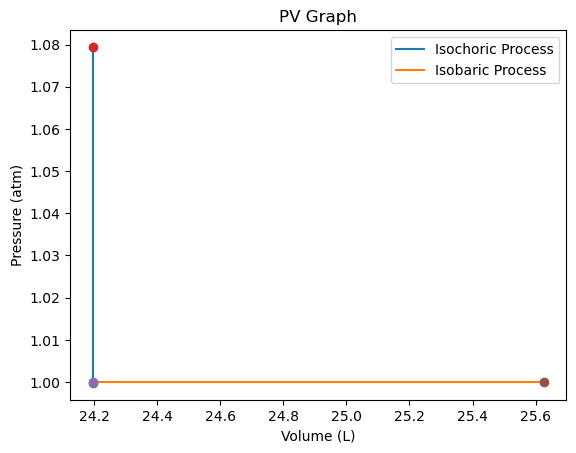

In [8]:
#D:
def pressure(T3, V): #defining pressure to construct PV graph
    N = 6.022 * 10 **23
    k = 1.38 * 10 ** (-23) #J/K
    P = (1 / 101325) * ((N * k * T3) / V) #have to divide by 101325 to get pressure in atm
    return P #atm

#units = (J/K)(K)/m^3 = J/m^3 = Nm/m^3 = N/m^2 = 1 Pa
#101325 Pa = 1 atm

def volume(T3, P):
    N = 6.022 * 10 **23 #number of particles
    k = 1.38 * 10 ** (-23) #J/K
    V = (1000) * ((N * k * T3) / P) #need to multiply 1000 to have units in liters
    return V #L

#units = J/K * K / N/m^2 = J/(N/m^2) = Nm * m^2/N = m^3

final_pressure = pressure(295+23.5, 0.0242) #SI units of K, m^3
initial_pressure = pressure(295, 0.0242) #SI units of K, m^3
print("The initial pressure of the isochoric process is: ", np.round(initial_pressure, decimals=1), "atm")
print("The final pressure of the isochoric process is: ", np.round(final_pressure, decimals=1), "atm")

initial_volume = volume(295, 101325) #SI units of K, Pa
final_volume = volume(295 + temp_change, 101325) #SI units of K, Pa
print("The initial volume of the isobaric process is: ", np.round(initial_volume, decimals=1), "L")
print("The final volume of the isobaric process is: ", np.round(final_volume, decimals=1), "L")

x_isochoric = [initial_volume, initial_volume, initial_volume, initial_volume, initial_volume]
y_isochoric = np.linspace(initial_pressure, final_pressure, 5)

x_isobaric = np.linspace(initial_volume, final_volume, 5)
y_isobaric = [1, 1, 1, 1, 1] #same pressure = 1atm

#plt.plot(1, initial_pressure, 'o')
#plt.plot(1, final_pressure, 'o')

plt.plot(x_isochoric, y_isochoric, label="Isochoric Process")
plt.plot(x_isobaric, y_isobaric, label="Isobaric Process")

plt.plot(initial_volume, initial_pressure, 'o')
plt.plot(initial_volume, final_pressure, 'o')

plt.plot(initial_volume, 1, 'o')
plt.plot(final_volume, 1, 'o')

plt.title("PV Graph")
plt.xlabel("Volume (L)")
plt.ylabel("Pressure (atm)")
plt.legend()
plt.show()

- Since parts A/B and part C demonstrate isochoric and isobaric processes respectively, it makes sense that my graph contains a vertical and horizontal line. An isochoric process has a constant volume and therefore creates a vertical line with only pressure increasing. An isobaric process has a constant pressure and therefore creates a horizontal line with only volume increasing. These trends make sense because if temperature is increasing, either pressure or volume must also increase, since N and k are constant here. If either pressure or volume is constant, the other must increase to match the increase of temperature 

The initial pressure of the isochoric process is: 1.0 atm
The final pressure of the isochoric process is: 1.1 atm
The initial temperature of the isochoric process is: 295 K
The final temperature of the isochoric process is: 319 K
The initial temperature of the isobaric process is: 295 K
The final temperature of the isobaric process is: 312 K


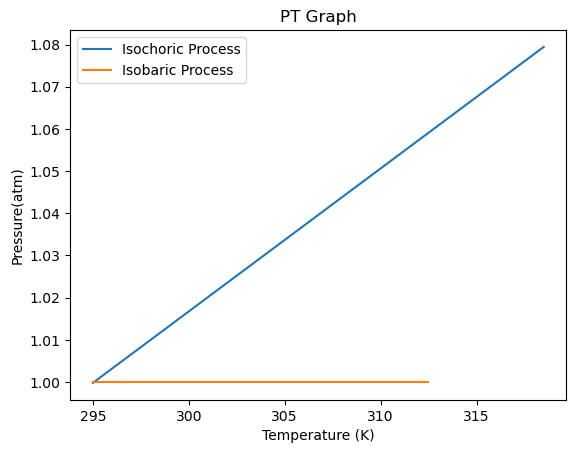

In [5]:
def pressure(T4):
    N = 6.022 * 10 **23 #number of particles
    k = 1.38 * 10 ** (-23) #J/K
    V = 0.0242 #from initial volume of isobaric process
    P = (1 / 101325) * ((N * k * T4) / V)
    return P

initial_pressure_isochoric = pressure(295)
print("The initial pressure of the isochoric process is:", np.round(initial_pressure_isochoric, decimals=1), "atm")
final_pressure_isochoric = pressure(295 + 23.5)
print("The final pressure of the isochoric process is:", np.round(final_pressure_isochoric, decimals=1), "atm")
change_in_pressure_isochoric = np.linspace(initial_pressure_isochoric, final_pressure_isochoric, 50)
change_in_temperature_isochoric = np.linspace(295, 295+23.5, 50)
print("The initial temperature of the isochoric process is: 295 K")
print("The final temperature of the isochoric process is: 319 K")

change_in_temperature_isobaric = np.linspace(295, 295+temp_change, 50)
change_in_pressure_isobaric = np.linspace(1, 1, 50)
print("The initial temperature of the isobaric process is: 295 K")
print("The final temperature of the isobaric process is: 312 K")

plt.plot(change_in_temperature_isochoric, change_in_pressure_isochoric, label="Isochoric Process")
plt.plot(change_in_temperature_isobaric, change_in_pressure_isobaric, label="Isobaric Process")
plt.title("PT Graph")
plt.xlabel("Temperature (K)")
plt.ylabel("Pressure(atm)")
plt.legend()
plt.show()

- In the isochoric process, the pressure increases with an increasing temperature, which we see on the graph
- In the isobaric process, the pressure stays constant with an increasing temperature, which we also see on the graph. In isobaric systems, the volume increases with temperature, which is not a value on this graph